In [1]:
import numpy as np
import pandas as pd
import glob

import matplotlib.pylab as plt
import matplotlib.gridspec as gsp
from  matplotlib.ticker import MultipleLocator
import matplotlib as mpl
%matplotlib inline
#%config InlineBackend.figure_formats = ["retina"]

import microfit.database as db
import microfit.hdr as hdr
import microfit.chemiluminescence as chem
import microfit.pyrometry as pyro
#import microfit.analysis as anls
from microfit import analysis


#from scipy import optimize as opt
from importlib import reload
from collections import OrderedDict
#import seaborn as sns
import warnings
warnings.filterwarnings(action='once')
#warnings.filterwarnings(action='error')

In [41]:
Ti1_21 = np.array([1468.710555,
1468.710555,
1347.852394,
1347.852394,
1347.852394,
1347.852394,
1347.852394,
1350.96464,
1350.96464,
1335.24641,
1250.383902,
1255.173072,
1266.901918,
1276.575317,
1291.827217,
1308.038431,
1319.191456,
1332.761917,
])
Te1_21 = np.asarray([1393.330079,
1393.330079,
1247.669478,
1250.383902,
1197.881146,
1150.345319,
1150.345319,
1155.766307,
1158.877855,
1173.641759,
1186.068887,
1194.07908,
1206.798986,
1223.21413,
1235.824541,
1250.383902,
1270.038817,
1280.638518])
v1_21 =[2.5, 5, 7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, ]

In [42]:
m1_21 = [v1_21[i] for i in range(len(v1_21)) if v1_21[i]%20 == 0]

In [43]:
Ti1_12 = np.array([1335.847157
,1335.847157
,1350.678056
,1350.678056
,1350.678056
,1342.73014
,1342.275156
,1349.533697
,1350.678056
,1354.09559
,1361.079124
,1369.122747
,1376.095484
,1381.750816
,1389.532566
,1395.558182
,1400.931694])
Te1_12 = np.array([1282.153364
,1282.153364
,1282.153364
,1285.278188
,1291.532343
,1291.532343
,1300.683263
,1308.757899
,1314.18669
,1319.865379
,1324.812403
,1331.995827
,1342.275156
,1350.678056
,1361.079124
,1367.258849
,1369.122747])
v1_12 = [5, 7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
print(len(v1_12),len(Te1_12))

17 17


In [44]:
Te5_12 = np.asarray([922.9308641
,924.1985468
,935.088574
,961.9566817
,964.4833998
,978.8530556
,985.060514
,996.214085
,1006.124748
,1043.707436])
Ti5_12 = np.asarray([1174.006422
,1220.521228
,1227.884886
,1258.269966
,1254.666836
,1256.092787
,1268.994245
,1278.151145
,1138.446901
,1144.4752
])
v5_12 = [3, 4, 5, 6, 7, 8, 9, 10, 12.5, 15]

In [45]:
m5_12 = [v5_12[i] for i in range(len(v5_12)) if v5_12[i]%2 == 0]

In [46]:
Te5_6 = np.asarray([1264.385911
,1259.233147
,1259.702619
,1258.269966
,1266.458183
,1261.010382
,1264.608357
,1271.565546
,1283.466578
,1300.360003
])
Ti5_6 = np.asarray([1335.964262
,1333.214424
,1331.602377
,1333.085308
,1330.809717
,1329.330672
,1332.113813
,1332.73344
,1340.937039
,1370.294753
])
v5_6 = [3, 4, 5, 6, 7, 8, 9, 10, 12.5, 15]

In [47]:
Te10_12 = np.asarray([994.6724099, 
1030.793413,
1024.26020196844, 
976.2858739, 
938.0364353, 
910.51695, 
887.8397389, 
885.7256051, 
921.3990059, 
948.726772, 
988.3817877, 
992.1104564, 
991.1464916, 
1020.605743
])
Ti10_12 = np.asarray([1091.5512851497906, 
1120.762579, 
1098.621363557934, 
1091.5512851497906, 
1091.5512851497906, 
1088.8751341837751, 
1086.0601574226766, 
1086.0601574226766, 
989.2080077236324, 
1035.2851968538357, 
1070.9362866090032, 
1077.5792827210253, 
1058.2430153750076, 
1093.6846217081923
])
v10_12 = [3.3,  3.4,  3.5,  3.6,  3.8,  4. ,  4.5,  5. ,  6. ,  7. ,  8. , 9. , 10. , 11.]
print(len(v10_12))

14


In [48]:
m10_12 = [v10_12[i] for i in range(len(v10_12)) if v10_12[i]%2==0]

In [49]:
limits3 = {'ylim':(950,1300,),
          'yticks':range(950,1300,10),
          'xlim':(0,1),
          'xticks':range(0,1,20),
          'legend':'lower right'}
labels = {'xlabel':r'$v$ (cm/s)',
          'ylabel':r'Temperature $T$ (K)',
          'title':'',
          'legend':r'',
          'legend2':r'v = 40 cm/s'}
#runs = np.unique(np.array(['nheptane']))
#runs = runs[np.argsort([ int(r[3:]) for r in runs ])][-1::-1]
#print(runs)
mpl.rc('font',**{'family':'serif','serif':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams['legend.facecolor']='black'
plt.rcParams.update({'font.size': 16})
#col = mpl.rcParams['axes.color_cycle'] ## deprecated
# col = [c['color'] for c in mpl.rcParams['axes.prop_cycle']]
leg_fsize = 10

In [50]:
def tick_func(X,a):
    v = np.asarray(X)*a
    return ["%.1f" % z for z in v]


In [51]:
x = [1,2,2,3,4]

In [52]:
np.asarray(x)*2

array([2, 4, 4, 6, 8])

<input>:22: DeprecationWarning: invalid escape sequence \%
<ipython-input-53-8ad657fea59f>:22: DeprecationWarning: invalid escape sequence \%
  label='T+/20.95\% O2')


[None, None]

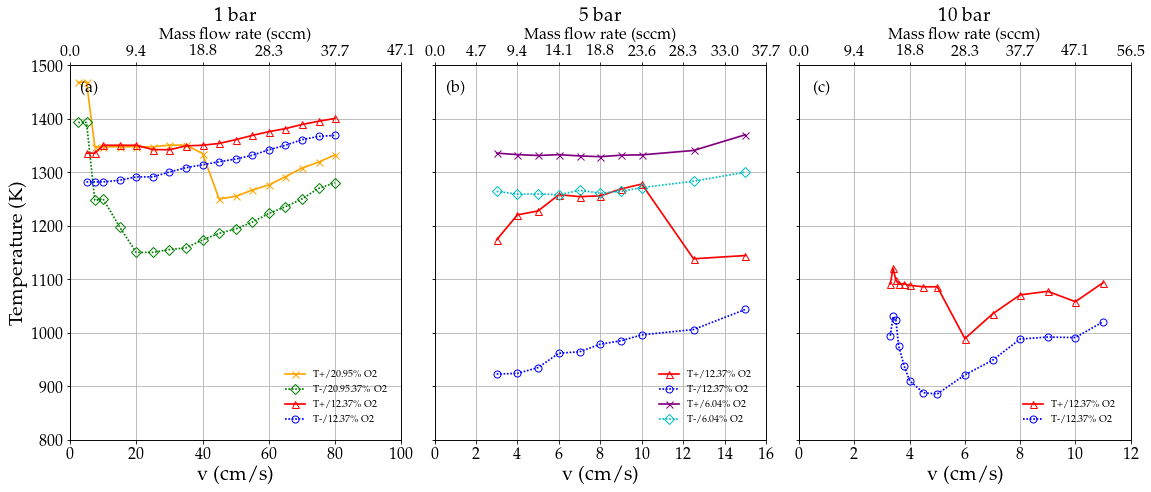

In [53]:
lw = 1.7
mv = MultipleLocator(100)
mh = MultipleLocator(100)
ht= 6
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['savefig.dpi'] = 500
# plt.rcParams['legend.facecolor']='w'
fig,ax = plt.subplots(1,3)
fig.set_size_inches(16.,6,forward= False )
fig.subplots_adjust(hspace=0,wspace=0.1,
                    bottom=.15*4/ht,top=1-((1-.95)*4./ht),
                    left=.15/14.*6.,right=.985)
for i in range(2):
    ax[i+1].set_yticklabels([])


ax[0].plot(v1_21,Ti1_21,
                   linewidth=lw,
                   color = 'orange', markerfacecolor= 'none',
                   marker='x',markersize=7,
                   label='T+/20.95\% O2')

ax[0].plot(v1_21,Te1_21,
                   linewidth=lw,linestyle=(0, (1, 1)),
                   color = 'g',
                   marker='D',markersize=7,
                   markerfacecolor= 'none',
                   label='T-/20.95.37\% O2')
ax[0].plot(v1_12,Ti1_12,
                   linewidth=lw,
                   color = 'r', markerfacecolor= 'none',
                   marker='^',markersize=7,
                   label='T+/12.37\% O2')
ax[0].plot(v1_12,Te1_12,
                   linewidth=lw,linestyle=(0, (1, 1)),
                   color = 'b',
                   marker='o',markersize=7,
                   markerfacecolor= 'none',
                   label='T-/12.37\% O2')
ax[0].set_xticks(np.arange(0, max(v1_21)+21,20))
ax[0].set_xlim(0,100)
ax1 = ax[0].twiny()
ax1.set_xlim(ax[0].get_xlim())
ax1.set_xticks(np.arange(0, max(m1_21)+22,20))
ax1.set_xticklabels(tick_func(np.arange(0, max(m1_21)+22,20),0.4712385))
ax1.set_xlabel('Mass flow rate (sccm)')
#############################################################################################
ax[1].plot(v5_12,Ti5_12,
                   linewidth=lw,
                   color = 'r', markerfacecolor= 'none',
                   marker='^',markersize=7,
                   label='T+/12.37\% O2')

ax[1].plot(v5_12,Te5_12,
                   linewidth=lw,linestyle=(0, (1, 1)),
                   color = 'b',
                   marker='o',markersize=7,
                   markerfacecolor= 'none',
                   label='T-/12.37\% O2')
# ax[1].set_xlim([int(0),None])
ax[1].plot(v5_6,Ti5_6,
                   linewidth=lw,
                   color = 'purple', markerfacecolor= 'none',
                   marker='x',markersize=7,
                   label='T+/6.04\% O2')
ax[1].plot(v5_6,Te5_6,
                   linewidth=lw,linestyle=(0, (1, 1)),
                   color = 'c',
                   marker='D',markersize=7,
                   markerfacecolor= 'none',
                   label='T-/6.04\% O2')
ax[1].set_xticks(np.arange(0, max(v5_12)+2,2))
ax[1].set_xlim(0,16)
ax2 = ax[1].twiny()
ax2.set_xlim(ax[1].get_xlim())
ax2.set_xticks(np.arange(0, max(m5_12)+7,2))
ax2.set_xticklabels(tick_func(np.arange(0, max(m1_21)+7,2),2.3561925))
ax2.set_xlabel('Mass flow rate (sccm)')
#################################################################################
ax[2].plot(v10_12,Ti10_12,
                   linewidth=lw,
                   color = 'r', markerfacecolor= 'none',
                   marker='^',markersize=7,
                   label='T+/12.37\% O2')

ax[2].plot(v10_12,Te10_12,
                   linewidth=lw,linestyle=(0, (1, 1)),
                   color = 'b',
                   marker='o',markersize=7,
                   markerfacecolor= 'none',
                   label='T-/12.37\% O2')
ax[2].set_xticks(np.arange(0, max(v10_12)+2,2))
ax[2].set_xlim(0,12)
ax3 = ax[2].twiny()
ax3.set_xlim(ax[2].get_xlim())
ax3.set_xticks(np.arange(0, max(m10_12)+3,2))
ax3.set_xticklabels(tick_func(np.arange(0, max(m10_12)+3,2),4.712385))
ax3.set_xlabel('Mass flow rate (sccm)')
#######################################################################################
for x in range(3):
    ax[0].set_ylabel('Temperature (K)', fontsize = 20)
    ax[x].set_ylim(800, 1500)
    ax[x].set_xlim([0,None])
    ax[x].yaxis.set_minor_locator(mv)
    ax[x].xaxis.set_minor_locator(mh)
    ax[x].grid(b=None, which='major', axis='both')
    ax[x].set_facecolor('none')
    ax[x].set_xlabel('v (cm/s)', fontsize = 20) 
    ax[x].yaxis.set_minor_locator(mv)
    ax[x].xaxis.set_minor_locator(mh)
for x in range(3):
    leg = ax[x].legend(fancybox=True,facecolor = 'white')
    leg.facecolor='white'
    leg.draw_frame(True)
    leg = ax[x].legend(loc=limits3['legend'],facecolor='white',prop={'size':leg_fsize},title=labels['legend'],fancybox=True,framealpha=1, shadow=True, borderpad=1)
    leg.draw_frame(False)
    leg.draw_frame(False)
ax[0].text(3,1450,'(a)')
ax[1].text(0.55,1450,'(b)')
ax[2].text(0.5,1450,'(c)')    
ax[0].set_title('1 bar')
ax[1].set_title('5 bar')
ax[2].set_title('10 bar')
plt.setp(leg.get_title(),fontsize=leg_fsize)    

In [54]:
m1_21

[20, 40, 60, 80]